# Importing packages

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Loading data

In [48]:
data = pd.read_csv('XAUUSD.csv', skiprows=1) # Skip first row because of XAUUSD Historical Data

In [49]:
data

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,7/4/2023 0:00,1921.07,1930.22,1920.34,1929.65,858,0.44
1,7/3/2023 0:00,1917.70,1930.50,1910.11,1921.17,347,0.18
2,7/2/2023 0:00,1920.30,1920.30,1917.50,1917.70,-260,-0.14
3,6/30/2023 0:00,1908.71,1922.61,1900.57,1919.20,1049,0.55
4,6/29/2023 0:00,1909.47,1913.00,1893.16,1908.76,-71,-0.04
...,...,...,...,...,...,...,...
617,7/8/2021 0:00,1803.29,1818.00,1793.90,1803.75,46,0.03
618,7/7/2021 0:00,1795.28,1809.50,1793.41,1803.22,794,0.44
619,7/6/2021 0:00,1790.85,1814.89,1789.89,1795.68,483,0.27
620,7/5/2021 0:00,1786.68,1794.00,1783.80,1791.15,447,0.25


# Preprocessing

In [50]:
# Convert the Date column to a datetime object
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %H:%M')

# Set the Date column as the index
data.set_index('Date', inplace=True)

# Sort the data in ascending order of dates
data.sort_index(ascending=True, inplace=True)

# Remove unnecessary columns
data = data[['Close']]

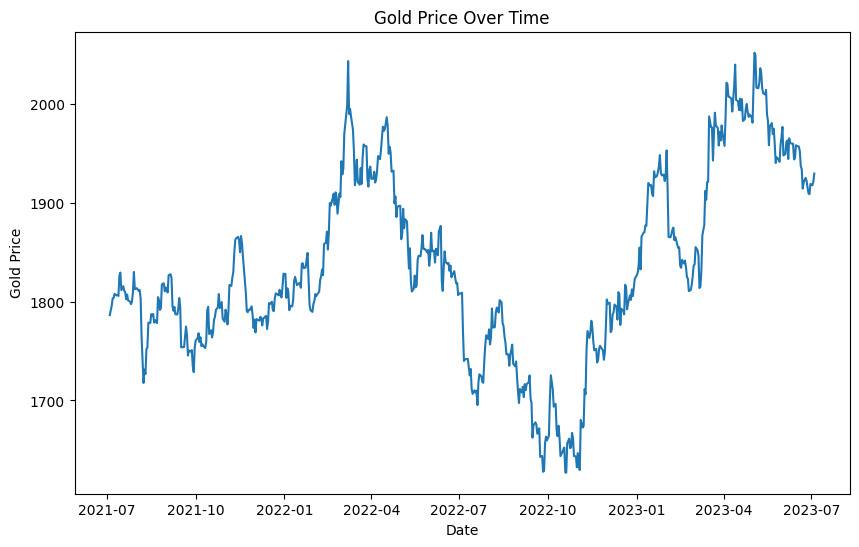

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'])
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Over Time')
plt.show()


# Train Test Split

In [18]:
train_size = int(len(data) * 0.8)  # 80% for training, 20% for testing
train_data = data[:train_size]
test_data = data[train_size:]

# Load the model and train it

- ARIMA (Autoregressive Integrated Moving Average) is a time series forecasting model that combines autoregressive (AR), integrated (I), and moving average (MA) components. The AR component captures the relationship between an observation and a fixed number of lagged observations, the MA component represents the dependency between the observation and the residual errors from previous predictions, and the I component is responsible for differencing the data to achieve stationarity. ARIMA models are widely used for analyzing and predicting time series data, making them valuable tools in various fields such as finance, economics, and weather forecasting.

In this case, (2, 1, 0) represents an ARIMA model with an AR order of 2, an I order of 1, and a MA order of 0

In [35]:
model = ARIMA(train_data, order=(2, 1, 0)) 
model_fit = model.fit()

/home/ali/anaconda3/envs/nlp_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ali/anaconda3/envs/nlp_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ali/anaconda3/envs/nlp_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


- start: the prediction should start from the first observation in the test data.
- end: the last observation index for which predictions are made

In [41]:
predicstions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

/home/ali/anaconda3/envs/nlp_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


497    1872.622454
498    1872.169839
499    1872.201241
500    1872.246866
501    1872.243762
          ...     
617    1872.239863
618    1872.239863
619    1872.239863
620    1872.239863
621    1872.239863
Name: predicted_mean, Length: 125, dtype: float64
(MAE): 85.739271573954
(MSE): 9154.586346386917
(RMSE): 95.67960256181522


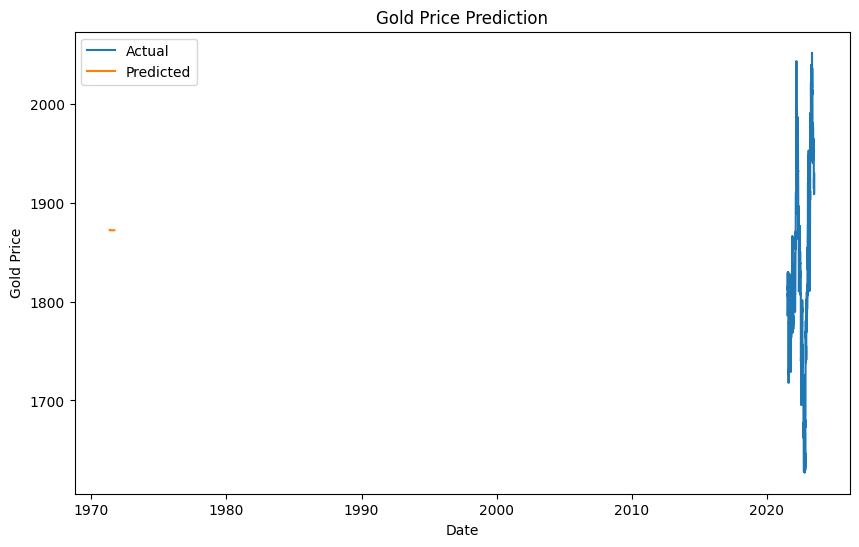

In [51]:
print(predictions)
# Evaluate the model
mae = mean_absolute_error(test_data['Close'], predictions)
mse = mean_squared_error(test_data['Close'], predictions)
rmse = mean_squared_error(test_data['Close'], predictions, squared=False)

print('(MAE):', mae)
print('(MSE):', mse)
print('(RMSE):', rmse)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(predictions.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Prediction')
plt.legend()
plt.show()
